## Градиентный спуск и его модификации

Выполнил студент группы Ивченко Анна

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def sphere_function(x, y):
    """
    Функция сферы.
    """
    return x**2 + y**2

def sphere_gradient(x, y):
    """
    Градиент функции сферы.
    """
    return np.array([2 * x, 2 * y])

In [3]:
# функция Бута
def booth_function(x, y):
    """
    Функция Бута.
    """
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

def booth_gradient(x, y):
    """
    Градиент функции Бута.
    """
    return np.array([
        2*(x + 2*y - 7) + 4*(2*x + y - 5),
        4*(x + 2*y - 7) + 2*(2*x + y - 5)
    ])

In [4]:
# Реализация классического градиентного спуска
def gradient_descent(start_point, function, gradient, learning_rate, num_iterations):
    """
    Классический градиентный спуск для любой функции.
    
    :param start_point: Начальная точка (x, y)
    :param function: Функция, которую нужно оптимизировать
    :param gradient: Градиент функции
    :param learning_rate: Скорость обучения
    :param num_iterations: Количество итераций
    :return: Список точек, посещённых в процессе оптимизации
    """
    points = [start_point]
    current_point = np.array(start_point)
    
    for _ in range(num_iterations):
        grad = gradient(*current_point)
        current_point = current_point - learning_rate * grad
        points.append(current_point)
    
    return np.array(points)

In [5]:
def test_gradient_descent(start_point, function, gradient, learning_rate, num_iterations, optimizer=gradient_descent):
    """
    Тестирование градиентного спуска для любой функции.
    
    :param start_point: Начальная точка (x, y)
    :param function: Функция, которую нужно оптимизировать
    :param gradient: Градиент функции
    :param learning_rate: Скорость обучения
    :param num_iterations: Количество итераций
    :param optimizer: Функция оптимизации (по умолчанию - классический градиентный спуск)
    :return: Найденная точка оптимума и список посещённых точек
    """
    points = optimizer(start_point, function, gradient, learning_rate, num_iterations)
    final_point = points[-1]
    return final_point, points

In [6]:
def calculate_error(found_point, true_optimum):
    """
    Вычисление погрешности найденного решения.
    
    :param found_point: Найденная точка оптимума
    :param true_optimum: Истинный оптимум
    :return: Погрешность
    """
    return np.linalg.norm(found_point - true_optimum)

In [7]:
def plot_optimization_path(points, function, title):
    """
    Визуализация пути градиентного спуска для любой функции.
    
    :param points: Список точек, посещённых в процессе оптимизации
    :param function: Функция, которую нужно оптимизировать
    :param title: Заголовок графика
    """
    x = np.linspace(-10, 10, 100)
    y = np.linspace(-10, 10, 100)
    X, Y = np.meshgrid(x, y)
    Z = function(X, Y)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    
    # Путь оптимизации
    ax.plot(points[:, 0], points[:, 1], function(points[:, 0], points[:, 1]), 'r-o', markersize=5, label='Путь оптимизации')
    
    # Начальная точка (черный круг)
    start_point = points[0]
    ax.plot([start_point[0]], [start_point[1]], function(start_point[0], start_point[1]), 'ko', markersize=10, label='Начальная точка')
    
    # Найденная точка (красный круг)
    final_point = points[-1]
    ax.plot([final_point[0]], [final_point[1]], function(final_point[0], final_point[1]), 'ro', markersize=10, label='Найденная точка')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()

Найденная точка оптимума (Функция сферы): [6.73186943e-09 5.04890207e-09]
Погрешность (Функция сферы): 8.414836786079768e-09


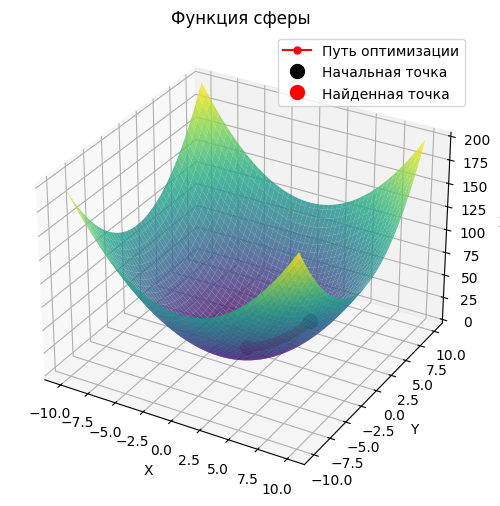

In [8]:
# Параметры для тестирования
start_point = [4, 3]
learning_rate = 0.01
num_iterations = 1000

# Функция сферы
function = sphere_function
gradient = sphere_gradient
true_optimum = np.array([0, 0])
title = 'Функция сферы'

# Запуск алгоритма
final_point, points = test_gradient_descent(start_point, function, gradient, learning_rate, num_iterations)

# Вычисление погрешности
error = calculate_error(final_point, true_optimum)
print(f"Найденная точка оптимума ({title}): {final_point}")
print(f"Погрешность ({title}): {error}")

# Визуализация
plot_optimization_path(points, function, title)

Найденная точка оптимума (Функция Бута): [1.13261956 2.86738045]
Погрешность (Функция Бута): 0.187552374582256


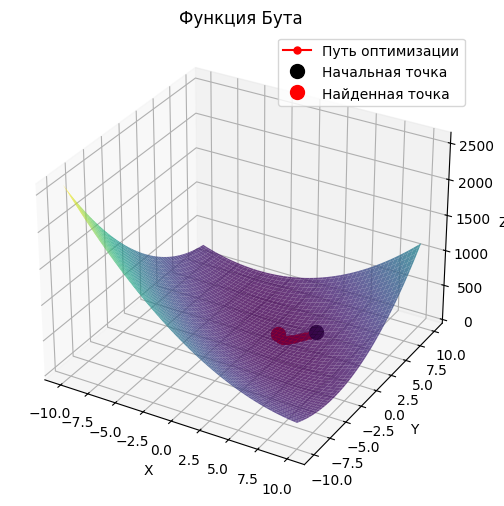

In [9]:
# Параметры для тестирования
start_point = [4, 4]
learning_rate = 0.01
num_iterations = 100

# Функция Бута
function = booth_function
gradient = booth_gradient
true_optimum = np.array([1, 3])
title = 'Функция Бута'

# Запуск алгоритма
final_point, points = test_gradient_descent(start_point, function, gradient, learning_rate, num_iterations)

# Вычисление погрешности
error = calculate_error(final_point, true_optimum)
print(f"Найденная точка оптимума ({title}): {final_point}")
print(f"Погрешность ({title}): {error}")

# Визуализация
plot_optimization_path(points, function, title)

In [10]:
# Моментная модификация (Momentum)
def gradient_descent_momentum(start_point, function, gradient, learning_rate, num_iterations, momentum=0.9):
    """
    Градиентный спуск с моментом для любой функции.
    
    :param start_point: Начальная точка (x, y)
    :param function: Функция, которую нужно оптимизировать
    :param gradient: Градиент функции
    :param learning_rate: Скорость обучения
    :param num_iterations: Количество итераций
    :param momentum: Коэффициент момента
    :return: Список точек, посещённых в процессе оптимизации
    """
    points = [start_point]
    current_point = np.array(start_point)
    velocity = np.zeros_like(current_point)  # Начальная скорость
    
    for _ in range(num_iterations):
        grad = gradient(*current_point)
        velocity = momentum * velocity - learning_rate * grad  # Обновление скорости
        current_point = current_point + velocity  # Обновление точки
        points.append(current_point)
    
    return np.array(points)

Найденная точка оптимума (Функция сферы (Momentum)): [0.01691245 0.01691245]
Погрешность (Функция сферы (Momentum)): 0.02391782305373233


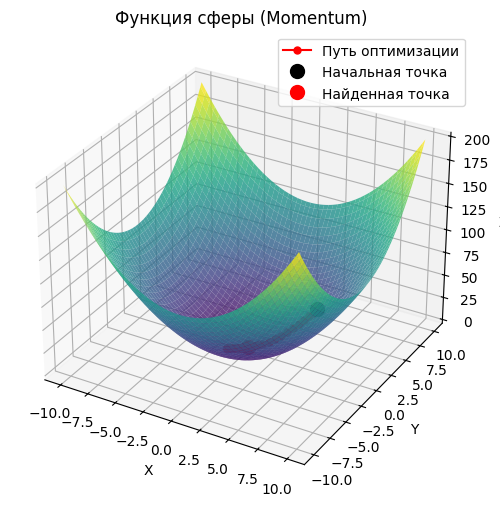

In [11]:
function = sphere_function
gradient = sphere_gradient
true_optimum = np.array([0, 0])
title = 'Функция сферы (Momentum)'
# Запуск алгоритма
final_point_momentum, points_momentum = test_gradient_descent(
    start_point, function, gradient, learning_rate, num_iterations, gradient_descent_momentum
)

# Вычисление погрешности
error_momentum = calculate_error(final_point_momentum, true_optimum)
print(f"Найденная точка оптимума ({title}): {final_point_momentum}")
print(f"Погрешность ({title}): {error_momentum}")

# Визуализация
plot_optimization_path(points_momentum, function, title)

Найденная точка оптимума (Функция Бута): [1.01412531 3.00566908]
Погрешность (Функция Бута): 0.01522047054574013


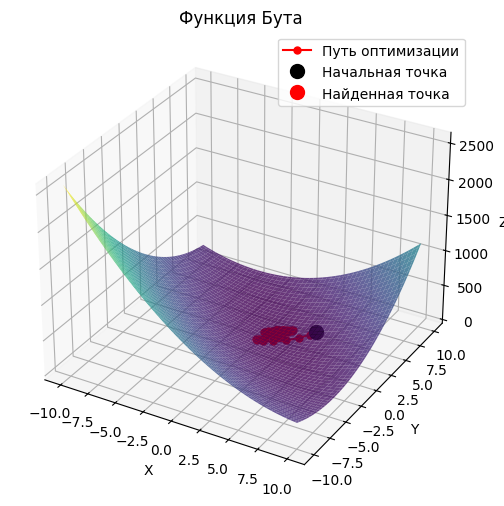

In [12]:
# Функция Бута
function = booth_function
gradient = booth_gradient
true_optimum = np.array([1, 3])
title = 'Функция Бута'
# Запуск алгоритма
final_point_momentum, points_momentum = test_gradient_descent(
    start_point, function, gradient, learning_rate, num_iterations, gradient_descent_momentum
)

# Вычисление погрешности
error_momentum = calculate_error(final_point_momentum, true_optimum)
print(f"Найденная точка оптимума ({title}): {final_point_momentum}")
print(f"Погрешность ({title}): {error_momentum}")

# Визуализация
plot_optimization_path(points_momentum, function, title)

In [13]:
# Адаптивная модификация (AdaGrad)
def gradient_descent_adagrad(start_point, function, gradient, learning_rate, num_iterations, epsilon=1e-8):
    """
    Градиентный спуск с AdaGrad для любой функции.
    
    :param start_point: Начальная точка (x, y)
    :param function: Функция, которую нужно оптимизировать
    :param gradient: Градиент функции
    :param learning_rate: Скорость обучения
    :param num_iterations: Количество итераций
    :param epsilon: Маленькое число для стабильности
    :return: Список точек, посещённых в процессе оптимизации
    """
    points = [start_point]
    current_point = np.array(start_point)
    grad_squared = np.zeros_like(current_point)  # Накопление квадратов градиентов
    
    for _ in range(num_iterations):
        grad = gradient(*current_point)
        grad_squared += grad ** 2
        adjusted_learning_rate = learning_rate / (np.sqrt(grad_squared) + epsilon)
        current_point = current_point - adjusted_learning_rate * grad
        points.append(current_point)
    
    return np.array(points)

Найденная точка оптимума (Функция сферы (AdaGrad)): [3.81571734 3.81571734]
Погрешность (Функция сферы (AdaGrad)): 5.396239208893135


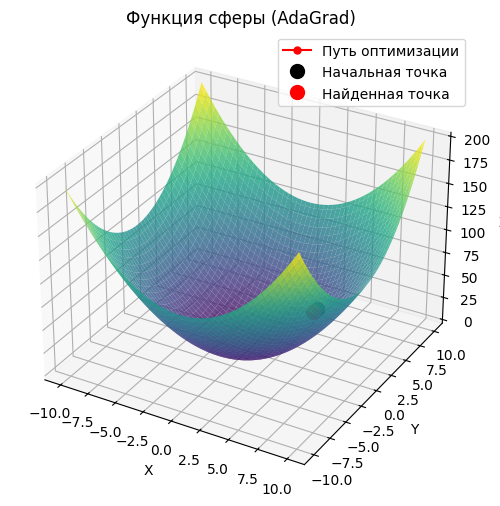

In [14]:
# Параметры для тестирования
start_point = [4.0, 4.0]
learning_rate = 0.01
num_iterations = 100

# Функция сферы
function = sphere_function
gradient = sphere_gradient
true_optimum = np.array([0, 0])
title = 'Функция сферы (AdaGrad)'

# Запуск алгоритма
final_point_adagrad, points_adagrad = test_gradient_descent(
    start_point, function, gradient, learning_rate, num_iterations, gradient_descent_adagrad
)

# Вычисление погрешности
error_adagrad = calculate_error(final_point_adagrad, true_optimum)
print(f"Найденная точка оптимума ({title}): {final_point_adagrad}")
print(f"Погрешность ({title}): {error_adagrad}")

# Визуализация
plot_optimization_path(points_adagrad, function, title)

Найденная точка оптимума (Функция Бута (AdaGrad)): [3.81719658 3.81757739]
Погрешность (Функция Бута (AdaGrad)): 2.9334330325246274


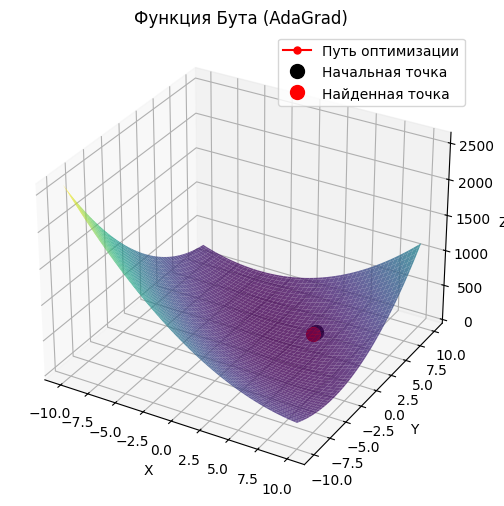

In [15]:
# Функция Бута
function = booth_function
gradient = booth_gradient
true_optimum = np.array([1, 3])
learning_rate = 0.01
title = 'Функция Бута (AdaGrad)'

# Запуск алгоритма
final_point_adagrad, points_adagrad = test_gradient_descent(
    start_point, function, gradient, learning_rate, num_iterations, gradient_descent_adagrad
)

# Вычисление погрешности
error_adagrad = calculate_error(final_point_adagrad, true_optimum)
print(f"Найденная точка оптимума ({title}): {final_point_adagrad}")
print(f"Погрешность ({title}): {error_adagrad}")

# Визуализация
plot_optimization_path(points_adagrad, function, title)

In [16]:
# метод эволюции темпа обучения (Learning Rate Decay)
def gradient_descent_lr_decay(start_point, function, gradient, initial_learning_rate, num_iterations, decay_rate=0.99):
    """
    Градиентный спуск с эволюцией темпа обучения для любой функции.
    
    :param start_point: Начальная точка (x, y)
    :param function: Функция, которую нужно оптимизировать
    :param gradient: Градиент функции
    :param initial_learning_rate: Начальная скорость обучения
    :param num_iterations: Количество итераций
    :param decay_rate: Коэффициент уменьшения темпа обучения
    :return: Список точек, посещённых в процессе оптимизации
    """
    points = [start_point]
    current_point = np.array(start_point)
    learning_rate = initial_learning_rate
    
    for i in range(num_iterations):
        grad = gradient(*current_point)
        current_point = current_point - learning_rate * grad
        points.append(current_point)
        learning_rate *= decay_rate  # Уменьшение темпа обучения
    
    return np.array(points)

Найденная точка оптимума (Функция сферы (LR Decay)): [0.53592537 0.53592537]
Погрешность (Функция сферы (LR Decay)): 0.7579129289131414


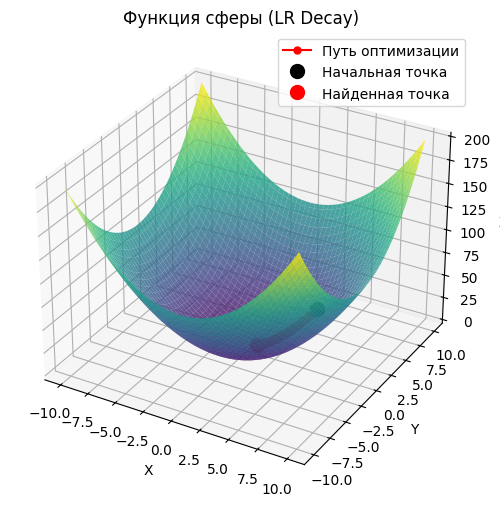

In [17]:
# Параметры для тестирования
start_point = [4, 4]
initial_learning_rate = 0.01
num_iterations = 1000
decay_rate = 0.95

# Функция сферы
function = sphere_function
gradient = sphere_gradient
true_optimum = np.array([0, 0])
title = 'Функция сферы (LR Decay)'

# Запуск алгоритма
final_point_lr_decay, points_lr_decay = test_gradient_descent(
    start_point, function, gradient, initial_learning_rate, num_iterations, gradient_descent_lr_decay
)

# Вычисление погрешности
error_lr_decay = calculate_error(final_point_lr_decay, true_optimum)
print(f"Найденная точка оптимума ({title}): {final_point_lr_decay}")
print(f"Погрешность ({title}): {error_lr_decay}")

# Визуализация
plot_optimization_path(points_lr_decay, function, title)

Найденная точка оптимума (Функция Бута (LR Decay)): [1.13398136 2.86601867]
Погрешность (Функция Бута (LR Decay)): 0.1894782322282861


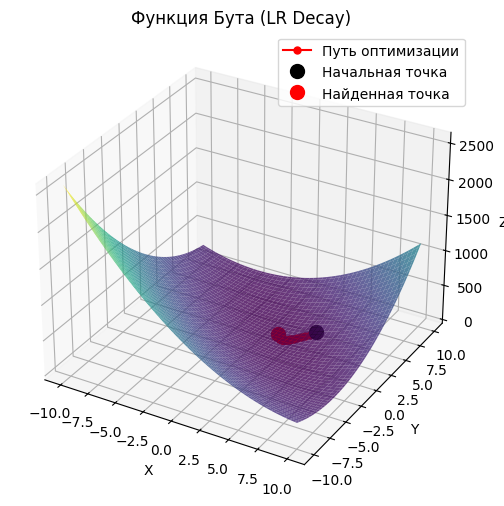

In [18]:
# Функция Бута
function = booth_function
gradient = booth_gradient
true_optimum = np.array([1, 3])
title = 'Функция Бута (LR Decay)'


# Запуск алгоритма
final_point_lr_decay, points_lr_decay = test_gradient_descent(
    start_point, function, gradient, initial_learning_rate, num_iterations, gradient_descent_lr_decay
)

# Вычисление погрешности
error_lr_decay = calculate_error(final_point_lr_decay, true_optimum)
print(f"Найденная точка оптимума ({title}): {final_point_lr_decay}")
print(f"Погрешность ({title}): {error_lr_decay}")

# Визуализация
plot_optimization_path(points_lr_decay, function, title)

## Вывод
